In [2]:
import numpy as np
import matplotlib.pyplot as plt

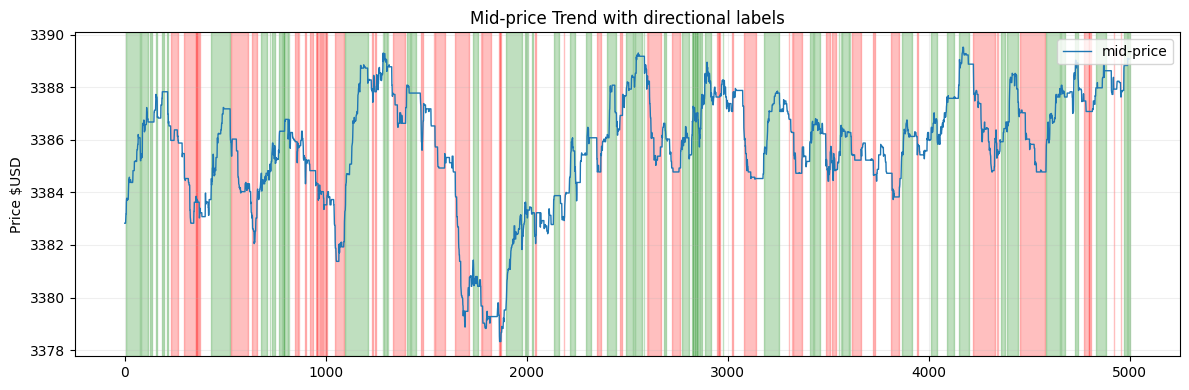

In [11]:
x_np = np.load(f"../../data/features/directional_labels_not_norm_mids_prev_day/k_50_categorical_labels_02_jan.npy")
mid_prices = np.load(f"../../data/features/mid_prices/mid_prices_02_jan.npy")
cat_labels = x_np[20_000:25_000]
mid_prices_plot = mid_prices[20_000:25_000]

threshold = 0.00001
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(mid_prices_plot, color="tab:blue", linewidth=1, label="mid-price")

start = 0
curr = cat_labels[0]
for i in range(1, len(cat_labels)):
    if cat_labels[i] != curr:
        if curr > threshold:
            ax.axvspan(start, i, color="green", alpha=.25)
        elif curr < -threshold:
            ax.axvspan(start, i, color="red", alpha=.25)
        start, curr = i, cat_labels[i]

# Draw final block
if curr > threshold:
    ax.axvspan(start, len(cat_labels), color="green", alpha=.25)
elif curr < -threshold:
    ax.axvspan(start, len(cat_labels), color="red", alpha=.25)

ax.set_title("Mid-price Trend with directional labels")
ax.set_ylabel("Price $USD")
ax.legend(loc="upper right")
ax.grid(alpha=.2)
plt.tight_layout()
plt.show()